In [41]:
import pandas as pd
data = pd.read_csv('spooky.csv')
data.head(10)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [42]:
import re
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')


repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
repl = r'\1\2\3'

def replace(word):
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)

    if repl_word != word:
        return replace(repl_word)
    else:
        return repl_word
    
def remove_repeating_chars(text):
    words = text.split()
    new_words = []
    for word in words:
        new_words.append(replace(word))
    return ' '.join(new_words)

[nltk_data] Downloading package wordnet to C:\Users\BADRO
[nltk_data]     INFO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
remove_repeating_chars('coool and Coooooool niice broo!')

'cool and Cool nice bro!'

In [44]:
import unicodedata

def remove_accented_chars_func(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

In [45]:
import re

def remove_url_email(text):
   
    text = re.sub(r'https?://\S+|www\.\S+', '[URL]', text)
    
    
    text = re.sub(r'\S+@\S+', '[EMAIL]', text)

    return text





In [46]:
text = "Voici un site https://www.example.com et un email test@example.com."
remove_url_email(text)

'Voici un site [URL] et un email [EMAIL]'

In [47]:
from bs4 import BeautifulSoup

def remove_html_tags_func(text):
    return BeautifulSoup(text, 'html.parser').get_text()

In [48]:
text = "<a href='http://example.com'>notre site</a>."
remove_html_tags_func(text)

'notre site.'

In [49]:
def replace_homoglyphs(text):
    homoglyph_map = {
        '$': 's', '0': 'o', '1': 'l', '@': 'a', '3': 'e', '4': 'a', '5': 's', 
        '7': 't', '8': 'b', '!': 'i', '|': 'l'
    }

    return ''.join(homoglyph_map.get(char, char) for char in text)

text = "$tupide!"
print(replace_homoglyphs(text))  # Résultat : "stupidei"





stupidei


In [50]:
def to_lower(text):
    return text.lower()

In [51]:
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation + string.digits)
    return text.translate(translator)

In [52]:
remove_punctuation( "My name is Amine, and I love Data Science.")

'My name is Amine and I love Data Science'

In [53]:
from nltk.corpus import stopwords
def remove_stopwords(text):
    en_stopwords = stopwords.words('english')
    en_stopwords = set(en_stopwords)
    words = text.lower().split()
    words = [w for w in words if w not in en_stopwords]
    return ' '.join(words)

In [54]:
remove_stopwords("My name is Amine, and I love Data Science.")

'name amine, love data science.'

In [55]:
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

In [56]:
import re

def remove_repeated_words_and_extra_spaces(text):
    
    text = re.sub(r'\b(\w+)\s+\1\b', r'\1', text)
    
    text = re.sub(r'\s+', ' ', text)
    
    text = text.strip()

    text = re.sub(r'\b(\w+)\s+\1\b', r'\1', text)
    return text


In [57]:
text = "un un un un exemple   avec   des   répétitions   et   des   espaces    inutiles   ."
cleaned_text = remove_repeated_words_and_extra_spaces(text)
print(cleaned_text)

un exemple avec des répétitions et des espaces inutiles .


In [58]:
def tokenize_sentence(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [59]:
tokenize_sentence("This is a sample, sentence with. punctuation marks!")

['This',
 'is',
 'a',
 'sample',
 ',',
 'sentence',
 'with',
 '.',
 'punctuation',
 'marks',
 '!']

In [60]:
from nltk.tokenize import sent_tokenize

def tokenize_sentence_with_regle(text):
    sentences = sent_tokenize(text)
    return sentences

In [61]:
tokenize_sentence_with_regle("This is the first sentence. This is the second sentence. This is the third sentence.")

['This is the first sentence.',
 'This is the second sentence.',
 'This is the third sentence.']

In [62]:

import re

def rulebase_tokenize(text):
    
    text = re.sub(r"([’'`])\s*", r"\1", text) 
    
    contractions = {
        r"\s*('m|M)\b": " am",     # I'm → am
        r"\s*('s|S)\b": " is",     # she's → she is (or he has)
        r"\s*('ll|LL)\b": " will", # she'll → she will
        r"\s*('d|D)\b": " would",  # he'd → he would (or he had)
        r"\s*('ve|VE)\b": " have", # they've → they have
        r"\s*(n't|N'T)\b": " not"  # didn't, isn't → not (ex: "don't" → "do not")
    }
    
    for contraction, replacement in contractions.items():
        text = re.sub(contraction, replacement, text)

    text = re.sub(r"(\S+)\s*-\s*(\S+)", r"\1\2", text)

    text = re.sub(r"[^\w\s\.,]", "", text)

    text = re.sub(r"(?<!\d),(?!\d)", r" , ", text)

    tokens = [token for token in re.split(r"\s+", text.strip()) if token]

    return tokens


In [63]:
rulebase_tokenize("It's a beautiful day, isn't it? I can't wait to go outside and enjoy it!")

['It',
 'is',
 'a',
 'beautiful',
 'day',
 ',',
 'is',
 'not',
 'it',
 'I',
 'ca',
 'not',
 'wait',
 'to',
 'go',
 'outside',
 'and',
 'enjoy',
 'it']

In [64]:
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, trainers

def tokenize_sentence_with_bpe(sentence):
    bpe_model = models.BPE()

    trainer = trainers.BpeTrainer(special_tokens=["<s>", "<pad>", "</s>", "<unk>", "<mask>"])
    tokenizer = Tokenizer(bpe_model)
    tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
    tokenizer.decoder = decoders.BPEDecoder()
    tokenizer.train_from_iterator([sentence], trainer=trainer)

    subwords = tokenizer.encode(sentence).tokens

    return subwords

In [65]:
tokenize_sentence_with_bpe("This is a sample sentence to be segmented into subwords unhappiness.")

['This',
 'is',
 'a',
 'sample',
 'sentence',
 'to',
 'be',
 'segmented',
 'into',
 'subwords',
 'unhappiness',
 '.']

In [66]:
import spacy

def extract_named_entities(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]

    named_entities = []
    for sentence in sentences:
        sentence_doc = nlp(sentence)
        for entity in sentence_doc.ents:
            named_entities.append(entity.text)

    return named_entities

In [67]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer

def reduce_text(text):

    words = nltk.word_tokenize(text)
    
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    
    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in words]
    
    return lemmas, stems

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [68]:
text = "Cats are was quickly"
lemmas, stems = reduce_text(text)
print("Lemmas:", lemmas)
print("Stems:", stems)

Lemmas: ['Cats', 'be', 'be', 'quickly']
Stems: ['cat', 'are', 'wa', 'quickli']


In [69]:
import re
import pandas as pd

def count_word_sentences(text,word):
    pattern = fr'[^.!?]*\b{re.escape(word)}\b[^.!?]*[.!?]'
    sentences = re.findall(pattern, text)
    return sum(word in sentence for sentence in sentences)

data['word_sentence_count'] = data['text'].apply(lambda x:count_word_sentences(x,'Great'))

great_counts = data.groupby('author')['word_sentence_count'].sum()

print(great_counts)

author
EAP     6
HPL    21
MWS     7
Name: word_sentence_count, dtype: int64


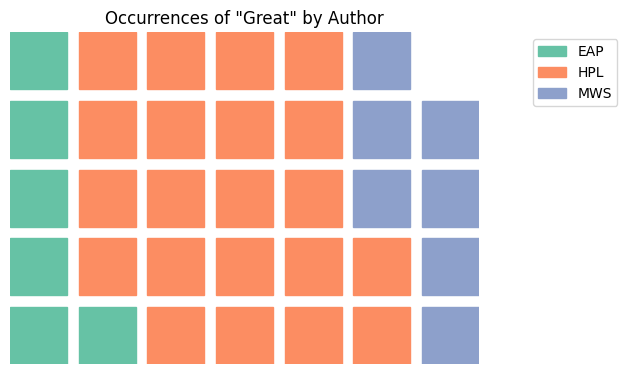

In [70]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=list(great_counts),
    labels=list(great_counts.index),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)

plt.title('Occurrences of "Great" by Author')
plt.show()

In [71]:
data['word_sentence_count'] = data['text'].apply(lambda x:count_word_sentences(x,'impossible'))

impossible_counts = data.groupby('author')['word_sentence_count'].sum()

print(impossible_counts)

author
EAP    60
HPL    16
MWS    19
Name: word_sentence_count, dtype: int64


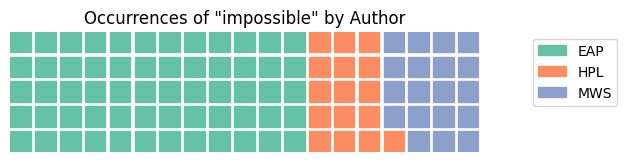

In [72]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=list(impossible_counts),
    labels=list(impossible_counts.index),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)

plt.title('Occurrences of "impossible" by Author')
plt.show()

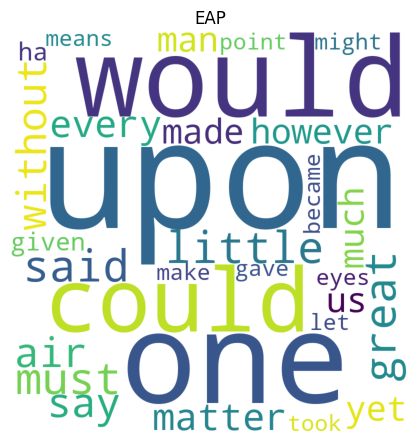

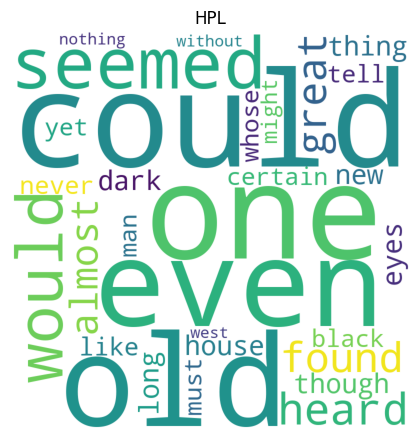

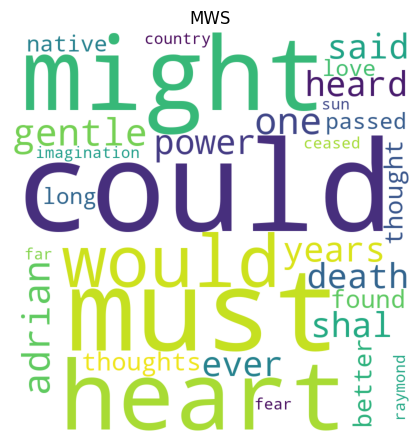

In [73]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import nltk


df = data

nlp = spacy.load('en_core_web_sm')

grouped = df.groupby('author')

for author, group in grouped:
 
    text = ' '.join(group['text'])[0:20000]
   
    text = remove_repeating_chars(text)
    text = remove_accented_chars_func(text)
    text = remove_url_email(text)
    text = remove_html_tags_func(text)
    text = to_lower(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    
    tokens = tokenize_sentence(text)
    
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(30)

    wordcloud = WordCloud(width = 800, height = 800, 
                          background_color ='white', 
                          stopwords = stopwords, 
                          min_font_size = 10).generate_from_frequencies(dict(most_common_words))
                        
    plt.figure(figsize = (4, 4), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(author)

In [74]:
from afinn import Afinn

In [75]:
afinn = Afinn(language='en')
afinn.score('terrible')

-3.0

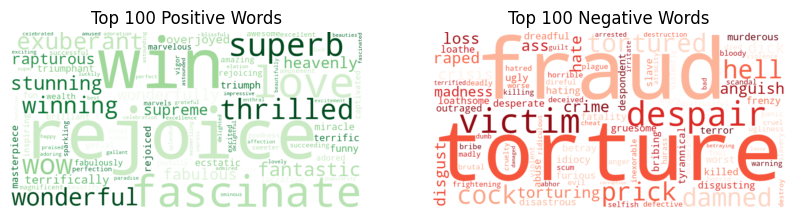

In [76]:
text = ' '.join(data['text'])
text = remove_repeating_chars(text)
text = remove_accented_chars_func(text) 
text = remove_url_email(text)
text = remove_html_tags_func(text)
text = to_lower(text)
text = remove_punctuation(text)
text = remove_stopwords(text)

tokens = tokenize_sentence(text)

words = pd.DataFrame(tokens, columns=['words']).drop_duplicates()

words['score'] = words['words'].apply(afinn.score)
pos_words = words.sort_values(by='score', ascending=False).head(100)['words'].tolist()
neg_words = words.sort_values(by='score', ascending=True).head(100)['words'].tolist()

positive_wordcloud = WordCloud(width=800, height=400, background_color='white',
                               colormap='Greens').generate(" ".join(pos_words))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white',
                               colormap='Reds').generate(" ".join(neg_words))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(positive_wordcloud, interpolation='bilinear')
ax1.set_title('Top 100 Positive Words')
ax1.axis('off')
ax2.imshow(negative_wordcloud, interpolation='bilinear')
ax2.set_title('Top 100 Negative Words')
ax2.axis('off')
plt.show()

In [77]:

data['sentiment_score'] = data['text'].apply(afinn.score)

def get_polarity(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['polarity'] = data['sentiment_score'].apply(get_polarity)

polarite_par_auteur = data.groupby('author')['polarity'].agg(lambda x: x.value_counts().idxmax()).reset_index()


print(polarite_par_auteur)


  author  polarity
0    EAP   Neutral
1    HPL  Negative
2    MWS  Negative


In [78]:
print(data.info())           # Structure du dataset
print(data.isnull().sum())   # Valeurs manquantes
print(data.duplicated().sum())  # Doublons


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19579 non-null  object 
 1   text                 19579 non-null  object 
 2   author               19579 non-null  object 
 3   word_sentence_count  19579 non-null  int64  
 4   sentiment_score      19579 non-null  float64
 5   polarity             19579 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 917.9+ KB
None
id                     0
text                   0
author                 0
word_sentence_count    0
sentiment_score        0
polarity               0
dtype: int64
0


In [86]:
def clean_text(text):
    """Applique toutes les fonctions de nettoyage sur un texte."""
    text = remove_repeating_chars(text)
    text = remove_accented_chars_func(text)
    text = remove_url_email(text)
    text = remove_html_tags_func(text)
    text = replace_homoglyphs(text)
    text = to_lower(text)
    text = remove_punctuation(text)
    text = remove_special_characters(text)
    text = remove_repeated_words_and_extra_spaces(text)
    return text


In [87]:
# Appliquer la fonction `clean_text()` à la colonne 'text' et stocker le résultat dans une nouvelle colonne
data_cleaned = data.copy()  # Copie du DataFrame original
data_cleaned['text'] = data['text'].apply(clean_text)

# Afficher les premières lignes du DataFrame transformé
print(data_cleaned.head(10))


        id                                               text author  \
0  id26305  this proces however afforded me no means of as...    EAP   
1  id17569  it never once occurred to me that the fumbling...    HPL   
2  id11008  in his left hand was a gold snuff box from whi...    EAP   
3  id27763  how lovely is spring as we looked from windsor...    MWS   
4  id12958  finding nothing else not even gold the superin...    HPL   
5  id22965  a youth passed in solitude my best years spent...    MWS   
6  id09674  the astronomer perhaps at this point took refu...    EAP   
7  id13515         the surcingle hung in ribands from my body    EAP   
8  id19322  i knew that you could not say to yourself ster...    EAP   
9  id00912  i confess that neither the structure of langua...    MWS   

   word_sentence_count  sentiment_score  polarity  
0                    0              2.0  Positive  
1                    0             -2.0  Negative  
2                    0              8.0  Positive  

In [90]:
data_cleaned = data_cleaned.drop(columns=['word_sentence_count', 'sentiment_score','polarity'])
print(data_cleaned.head(10))


        id                                               text author
0  id26305  this proces however afforded me no means of as...    EAP
1  id17569  it never once occurred to me that the fumbling...    HPL
2  id11008  in his left hand was a gold snuff box from whi...    EAP
3  id27763  how lovely is spring as we looked from windsor...    MWS
4  id12958  finding nothing else not even gold the superin...    HPL
5  id22965  a youth passed in solitude my best years spent...    MWS
6  id09674  the astronomer perhaps at this point took refu...    EAP
7  id13515         the surcingle hung in ribands from my body    EAP
8  id19322  i knew that you could not say to yourself ster...    EAP
9  id00912  i confess that neither the structure of langua...    MWS


In [91]:
data_cleaned.to_csv('spooky_cleaned.csv', index=False)